# 차원 축소 알고리즘 : 주성분 분석 (PCA 클래스)

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2024-11-04 06:15:15--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-11-04 06:15:15--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-11-04 06:15:15--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
print(pca.components_.shape)
# 배열의 첫 번째 차원은 50, 주성분은 50개.

(50, 10000)


In [6]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

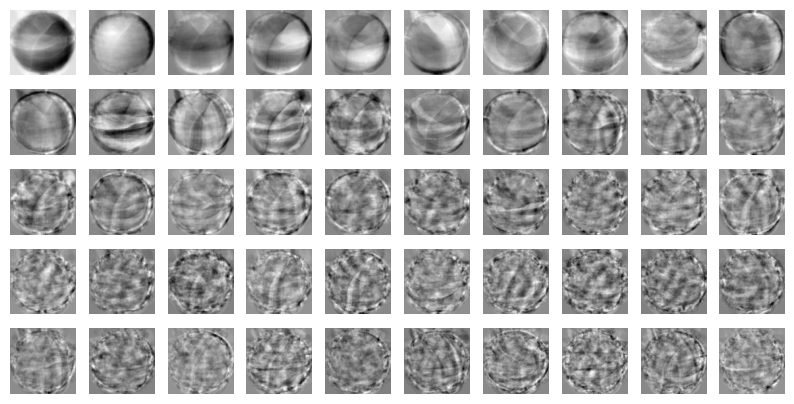

In [7]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [8]:
print(fruits_2d.shape)

(300, 10000)


In [9]:
fruits_pca = pca.transform(fruits_2d) # transform() 메서드 사용, 원본 데이터 차원을 50으로 줄임.
print(fruits_pca.shape)

(300, 50)


# 원본 데이터 재구성

In [10]:
fruits_inverse = pca.inverse_transform(fruits_pca)
# inverse_transform() 메서드 : 원본 데이터의 상당 부분 복구에 사용
print(fruits_inverse.shape)

(300, 10000)


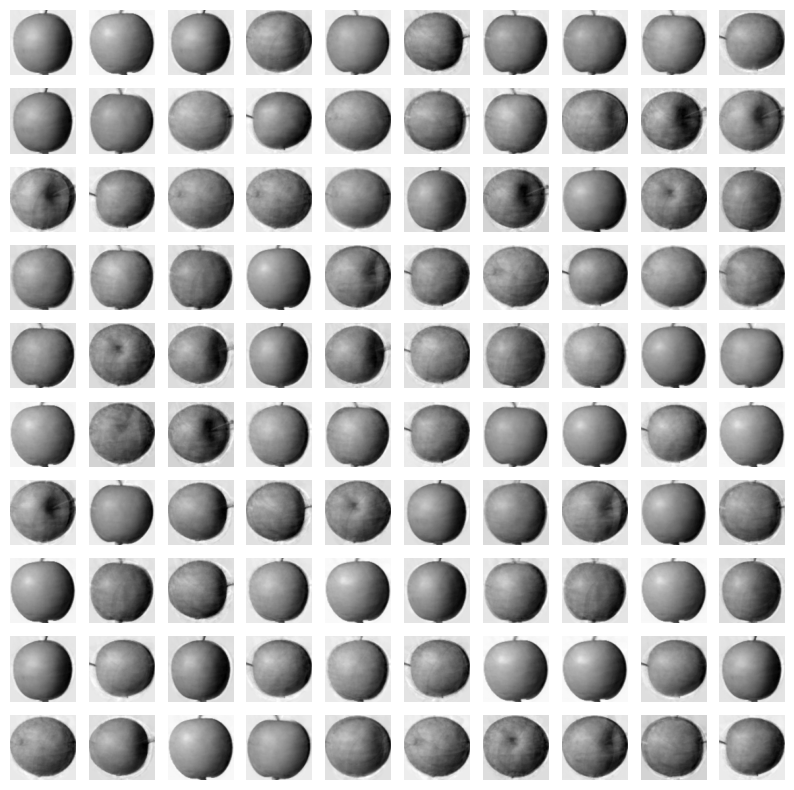

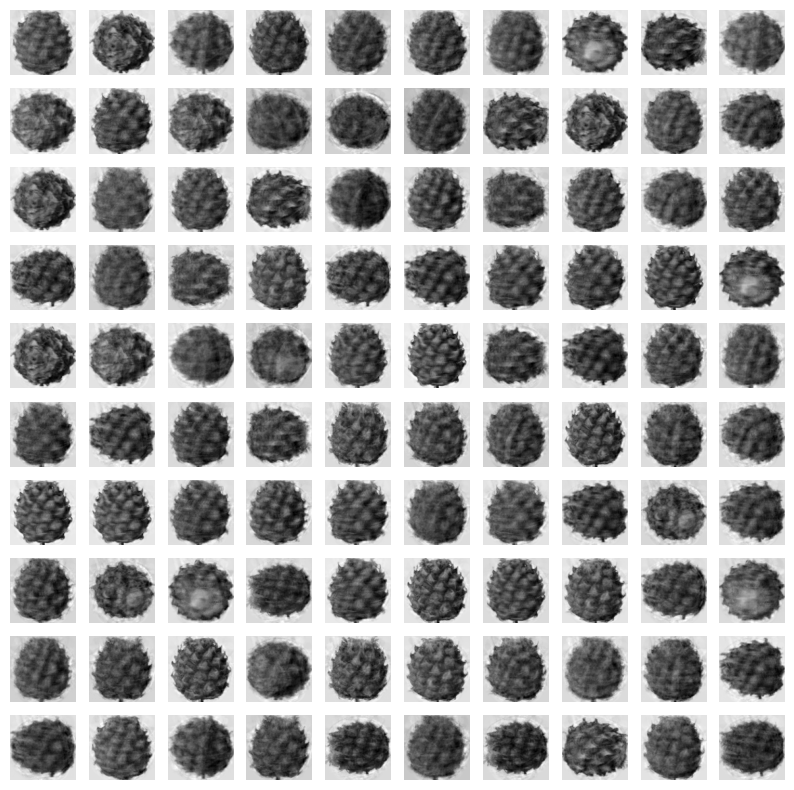

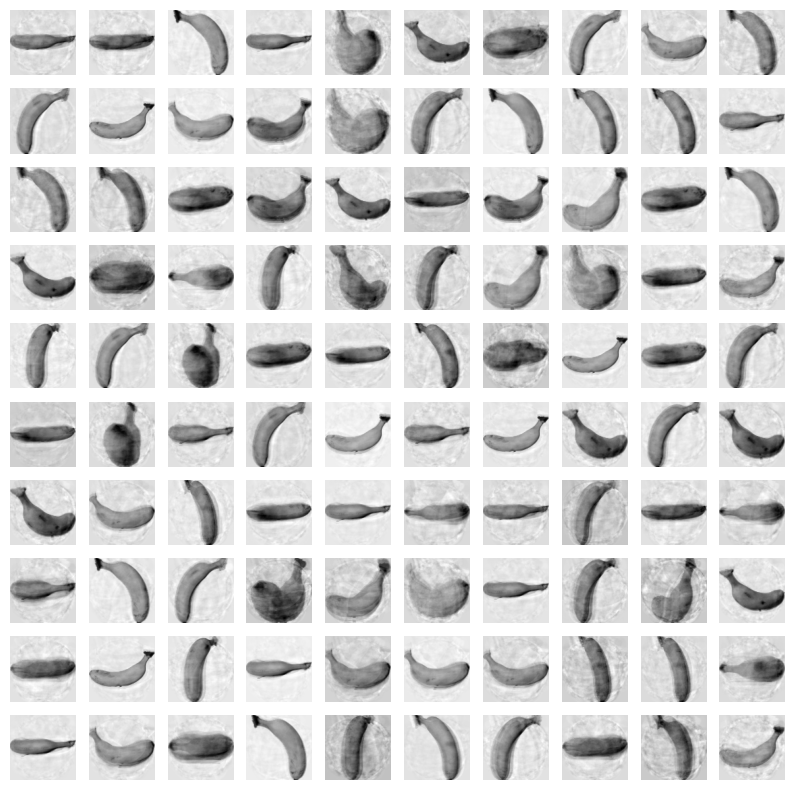

In [11]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

# 설명된 분산 : 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록

In [12]:
print(np.sum(pca.explained_variance_ratio_))
# 총 분산 비율

0.921493287068135


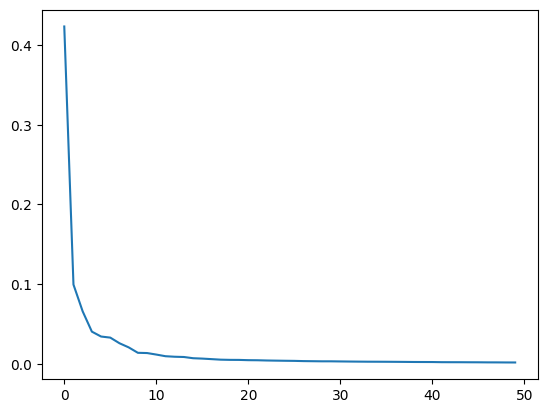

In [13]:
plt.plot(pca.explained_variance_ratio_)

# 다른 알고리즘과 함께 사용

PCA 를 지도학습에 적용

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [15]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)
# 100개의 0, 100개의 1, 100개의 2로 이루어진 타깃 데이터를 만듦.

In [16]:
from sklearn.model_selection import cross_validate # cross_validate 로 교차 검증 수

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) # 각 교차 검증에 걸린 시간

0.9966666666666667
2.8470790863037108


In [17]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) # 훈련 시간 감소.

0.9966666666666667
0.035992002487182616


In [18]:
pca = PCA(n_components=0.5) # 분산의 50%에 달하는 주성분에 달하는 PCA 모델
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [19]:
print(pca.n_components_) # 단 2개의 특성만으로 원본데이터의 50% 분산 표현 가능

2


In [20]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [21]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score'])) # 특성 2개 사용, 99% 정확도 달성
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9933333333333334
0.056948089599609376


In [22]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [23]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


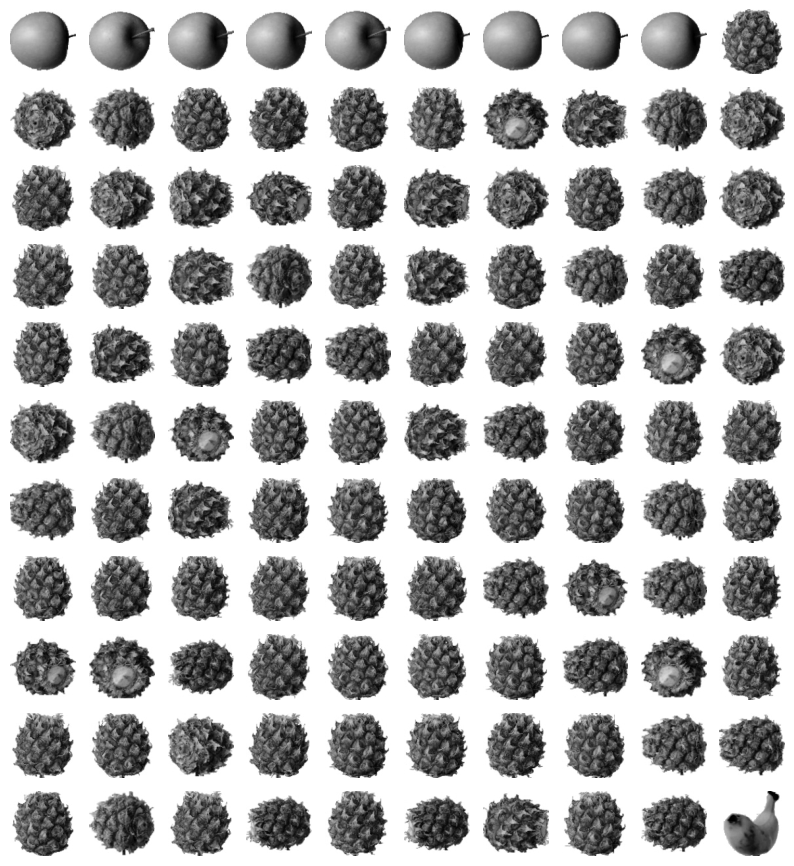

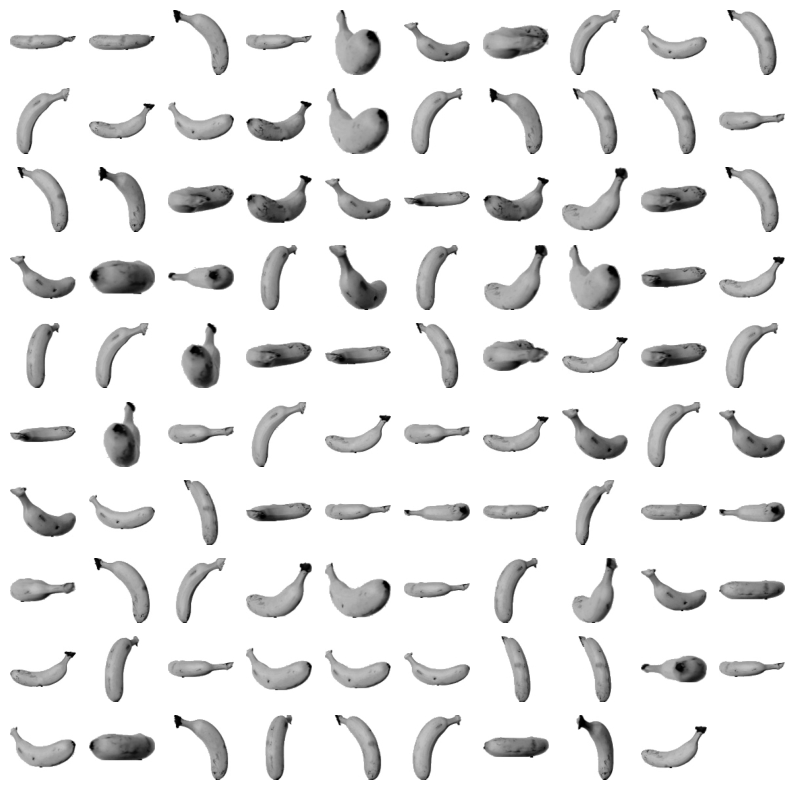

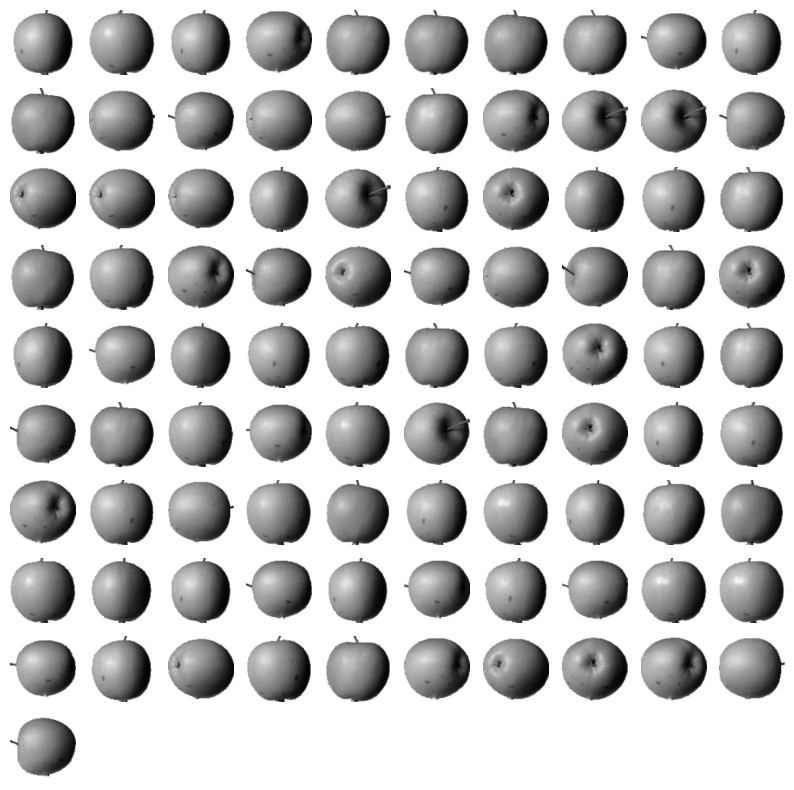

In [24]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

In [ ]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()